In [102]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [104]:
print("First 5 rows of the DataFrame:")
display(df.head())

print("\nData types of each column:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows of the DataFrame:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

Missing values per column:
RowNumber          0
CustomerId       

Histograms for Numerical Features:


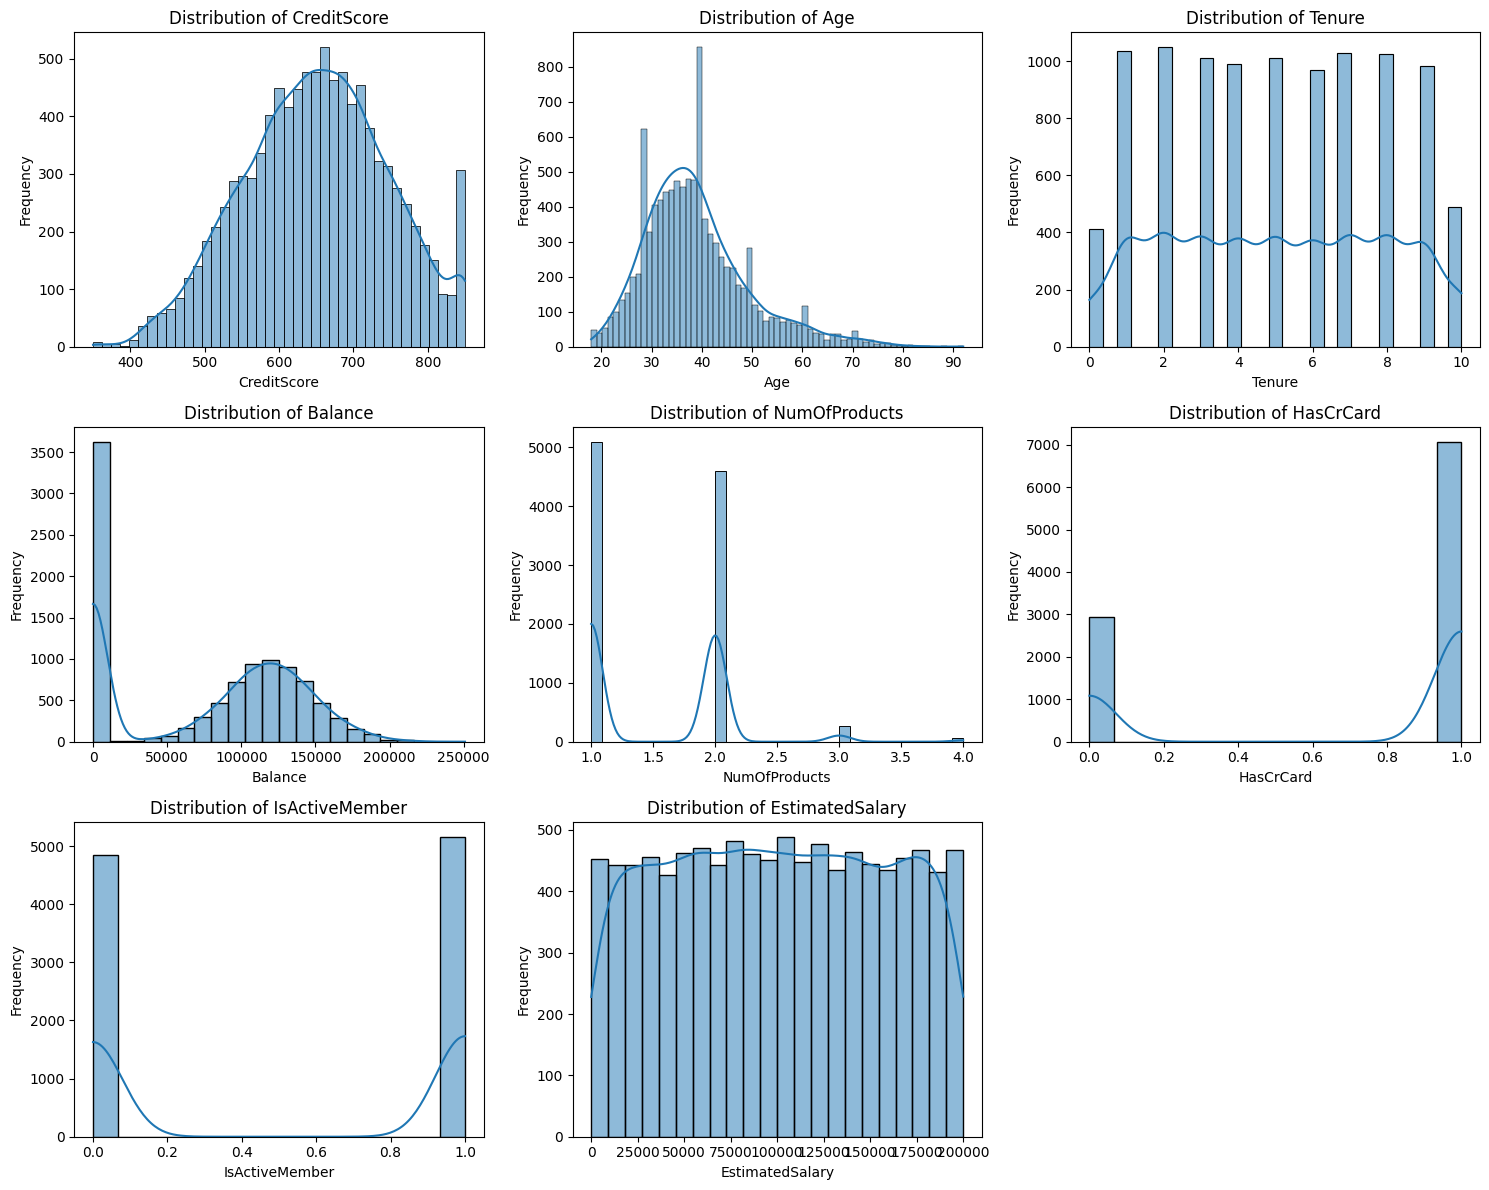


Box Plots for Numerical Features:


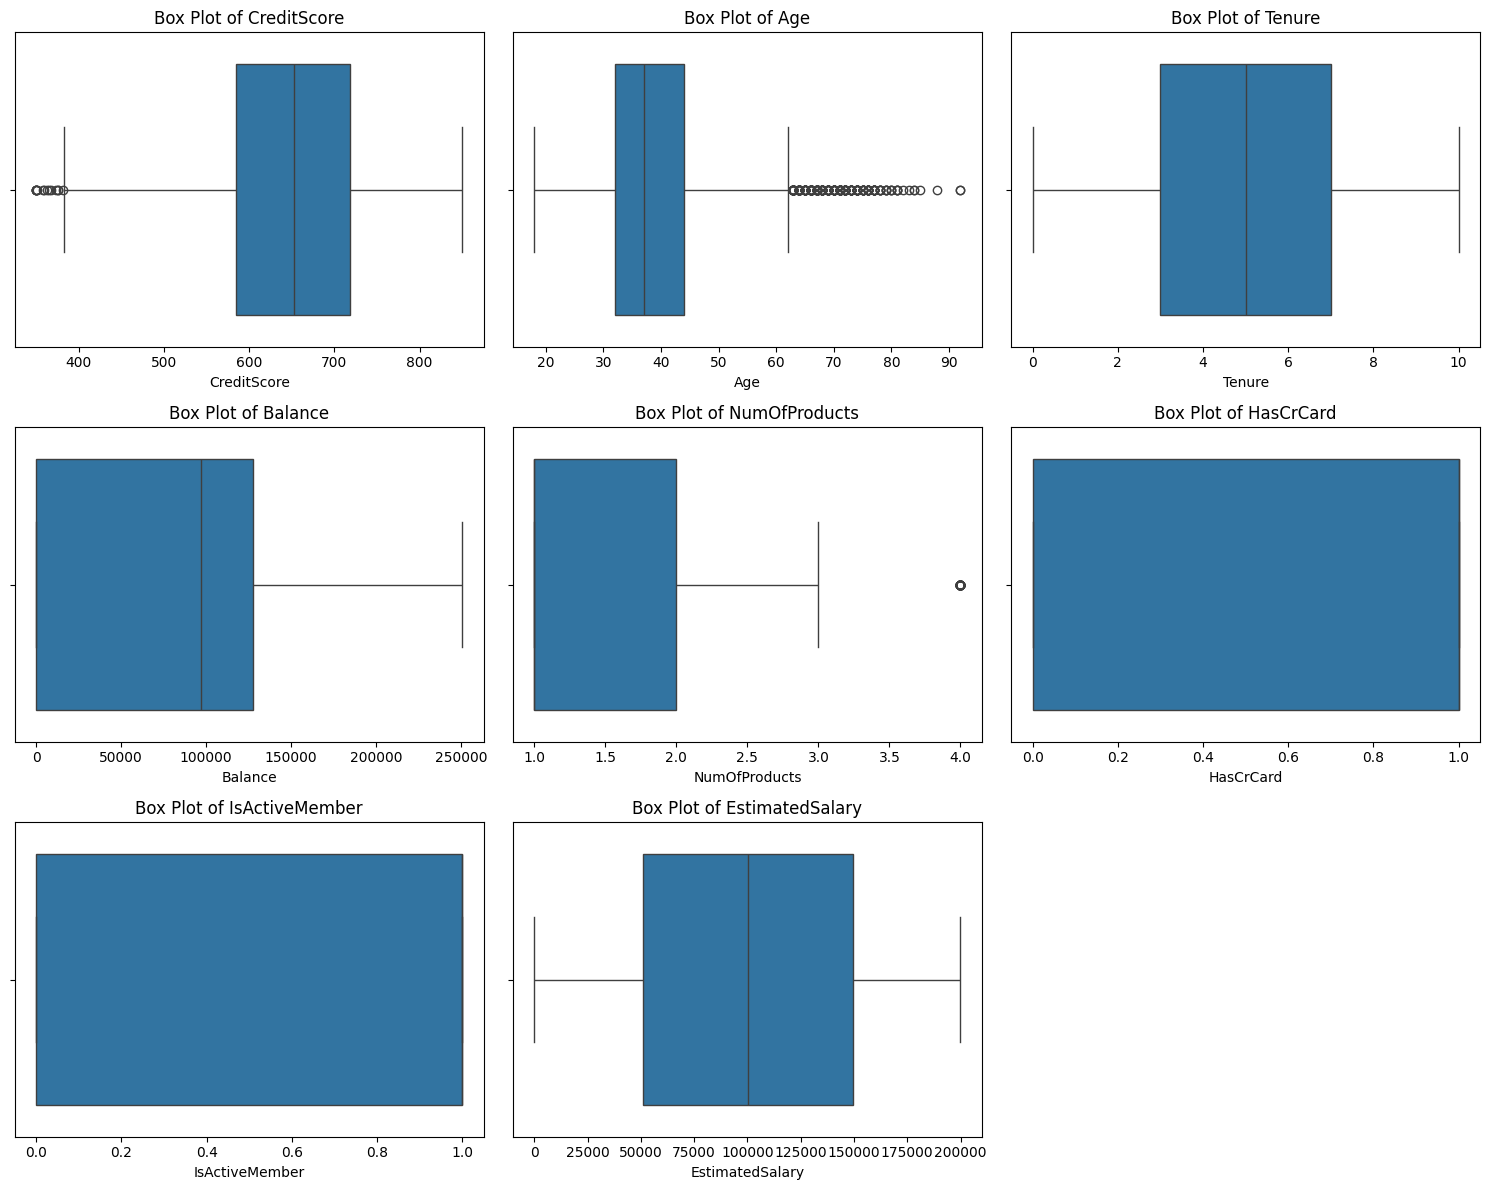


Bar Plots for Categorical Features:


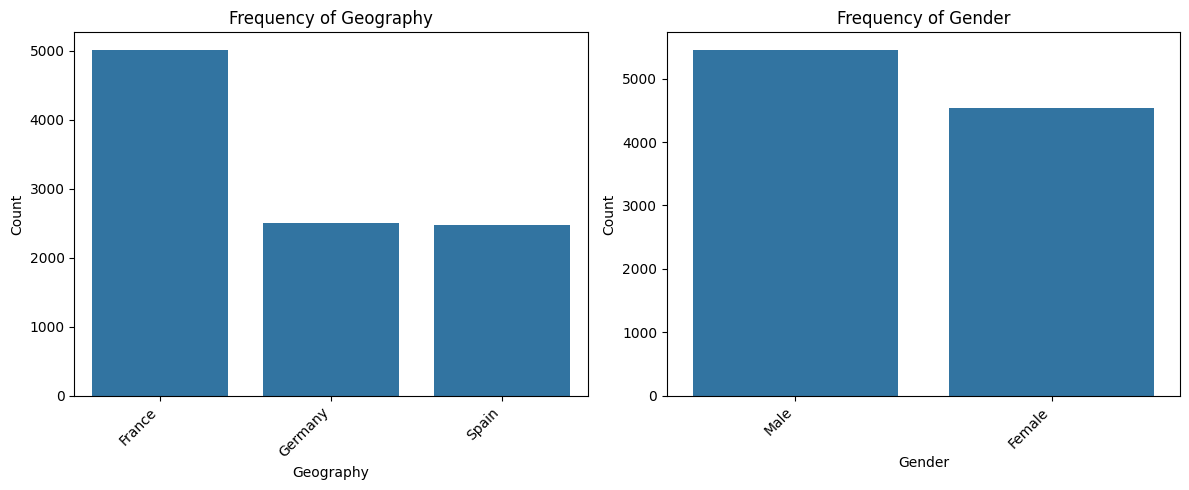

In [105]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

identifier_cols = ['RowNumber', 'CustomerId', 'Surname']
target_col = 'Exited'

numerical_features = [col for col in numerical_cols if col not in identifier_cols + [target_col]]
categorical_features = [col for col in categorical_cols if col not in identifier_cols]

# Plot histograms for numerical features
print("Histograms for Numerical Features:")
n_numerical_features = len(numerical_features)
n_cols = 3
n_rows = (n_numerical_features + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot box plots for numerical features
print("\nBox Plots for Numerical Features:")
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Plot bar plots for categorical features
print("\nBar Plots for Categorical Features:")
n_categorical_features = len(categorical_features)
n_cols_cat = 2
n_rows_cat = (n_categorical_features + n_cols_cat - 1) // n_cols_cat
plt.figure(figsize=(n_cols_cat * 6, n_rows_cat * 5))
for i, col in enumerate(categorical_features):
    plt.subplot(n_rows_cat, n_cols_cat, i + 1)
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Count Plots of Categorical Features vs Exited:


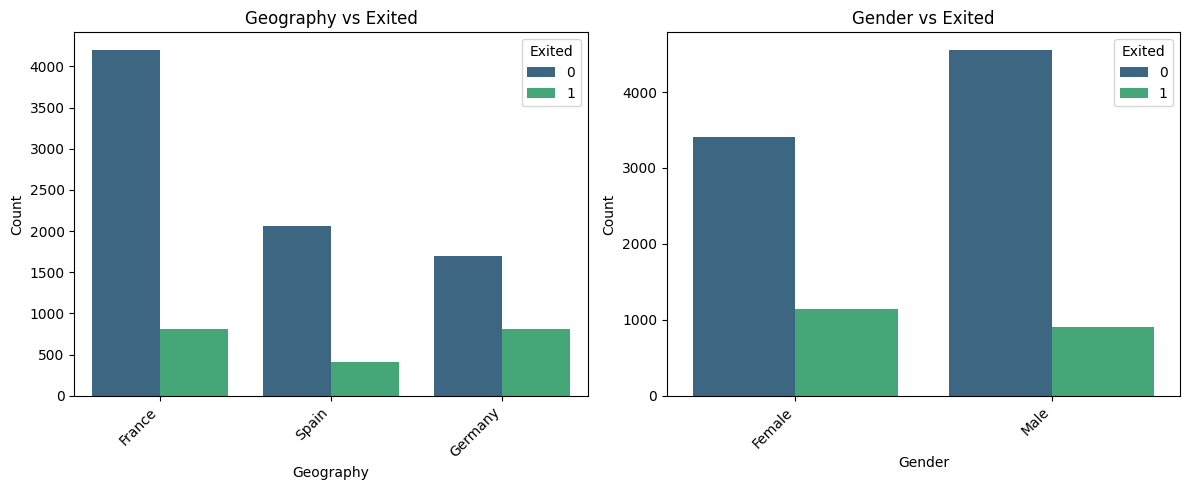


Box Plots of Numerical Features vs Exited:


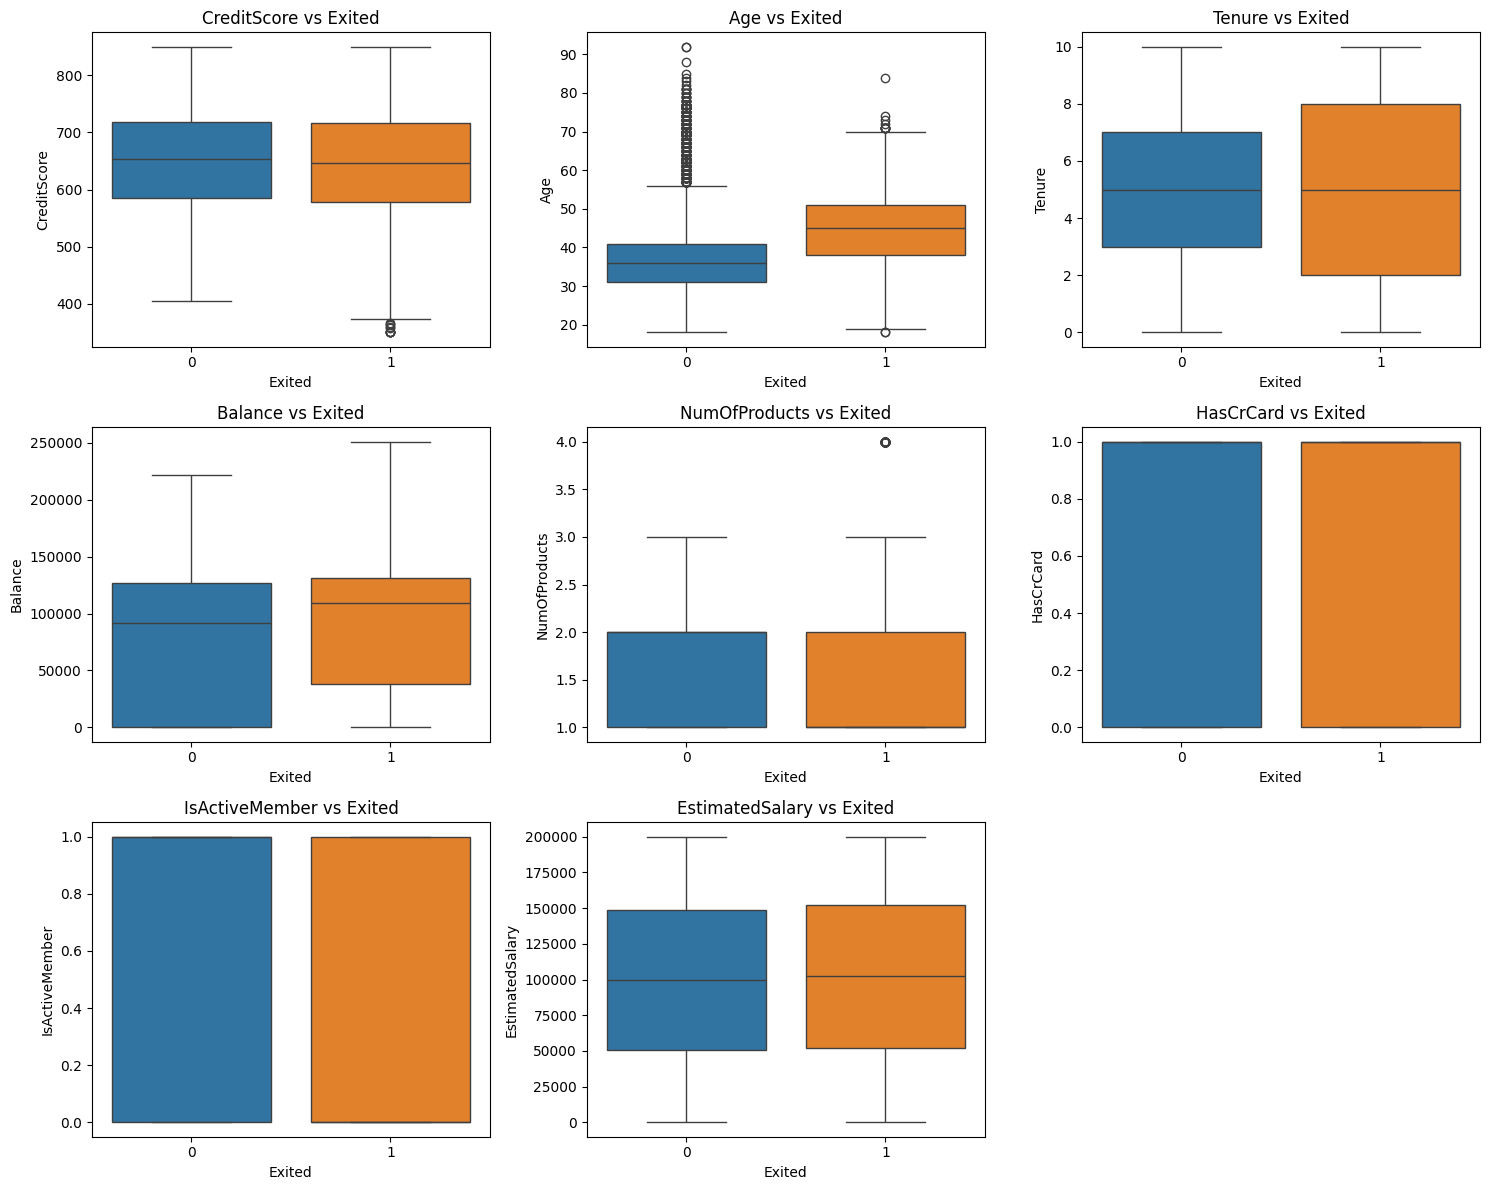


Correlation Matrix of Numerical Features:


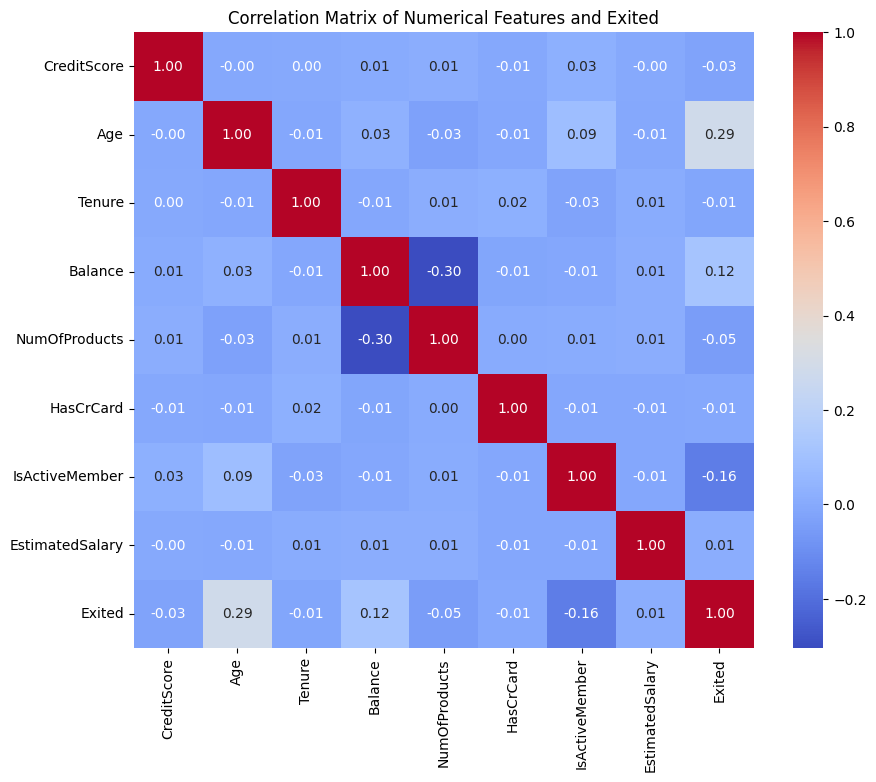

In [106]:
# Define features and target
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

identifier_cols = ['RowNumber', 'CustomerId', 'Surname']
target_col = 'Exited'

numerical_features = [col for col in numerical_cols if col not in identifier_cols + [target_col]]
categorical_features = [col for col in categorical_cols if col not in identifier_cols]

# Create count plots for categorical features vs 'Exited'
print("Count Plots of Categorical Features vs Exited:")
n_categorical_features = len(categorical_features)
n_cols_cat = 2
n_rows_cat = (n_categorical_features + n_cols_cat - 1) // n_cols_cat
plt.figure(figsize=(n_cols_cat * 6, n_rows_cat * 5))
for i, col in enumerate(categorical_features):
    plt.subplot(n_rows_cat, n_cols_cat, i + 1)
    sns.countplot(x=df[col], hue=df[target_col], palette='viridis')
    plt.title(f'{col} vs Exited')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Exited', loc='upper right')
plt.tight_layout()
plt.show()

# Create box plots for numerical features vs 'Exited'
print("\nBox Plots of Numerical Features vs Exited:")
n_numerical_features = len(numerical_features)
n_cols = 3
n_rows = (n_numerical_features + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[target_col], y=df[col], hue=df[target_col], legend=False)
    plt.title(f'{col} vs Exited')
    plt.xlabel('Exited')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Calculate and display the correlation matrix
print("\nCorrelation Matrix of Numerical Features:")
correlation_matrix = df[numerical_features + [target_col]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Exited')
plt.show()

In [107]:
skewness = df[numerical_features].skew()
print("Skewness of Numerical Features:")
print(skewness)

skewness_threshold = 0.5
highly_skewed_features = skewness[abs(skewness) > skewness_threshold].index.tolist()
print(f"\nNumerical Features with absolute skewness > {skewness_threshold}:")
print(highly_skewed_features)

Skewness of Numerical Features:
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
dtype: float64

Numerical Features with absolute skewness > 0.5:
['Age', 'NumOfProducts', 'HasCrCard']


In [108]:
df_transformed = df.copy()


df_transformed['Age'] = np.log1p(df_transformed['Age'])


df_transformed['NumOfProducts'] = np.sqrt(df_transformed['NumOfProducts'])

print("Skewness of Numerical Features after Transformation:")
print(df_transformed[numerical_features].skew())

Skewness of Numerical Features after Transformation:
CreditScore       -0.071607
Age                0.203360
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.420528
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
dtype: float64


In [109]:
print("Outlier Handling (Capping) for Numerical Features:")
for col in numerical_features:
    Q1 = df_transformed[col].quantile(0.25)
    Q3 = df_transformed[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df_transformed[(df_transformed[col] < lower_bound) | (df_transformed[col] > upper_bound)].shape[0]

    df_transformed[col] = df_transformed[col].clip(lower=lower_bound, upper=upper_bound)

    print(f"Feature '{col}': Identified and capped {outliers_count} outliers.")


Outlier Handling (Capping) for Numerical Features:
Feature 'CreditScore': Identified and capped 15 outliers.
Feature 'Age': Identified and capped 182 outliers.
Feature 'Tenure': Identified and capped 0 outliers.
Feature 'Balance': Identified and capped 0 outliers.
Feature 'NumOfProducts': Identified and capped 0 outliers.
Feature 'HasCrCard': Identified and capped 0 outliers.
Feature 'IsActiveMember': Identified and capped 0 outliers.
Feature 'EstimatedSalary': Identified and capped 0 outliers.


Histograms for Numerical Features after Transformation and Outlier Handling:


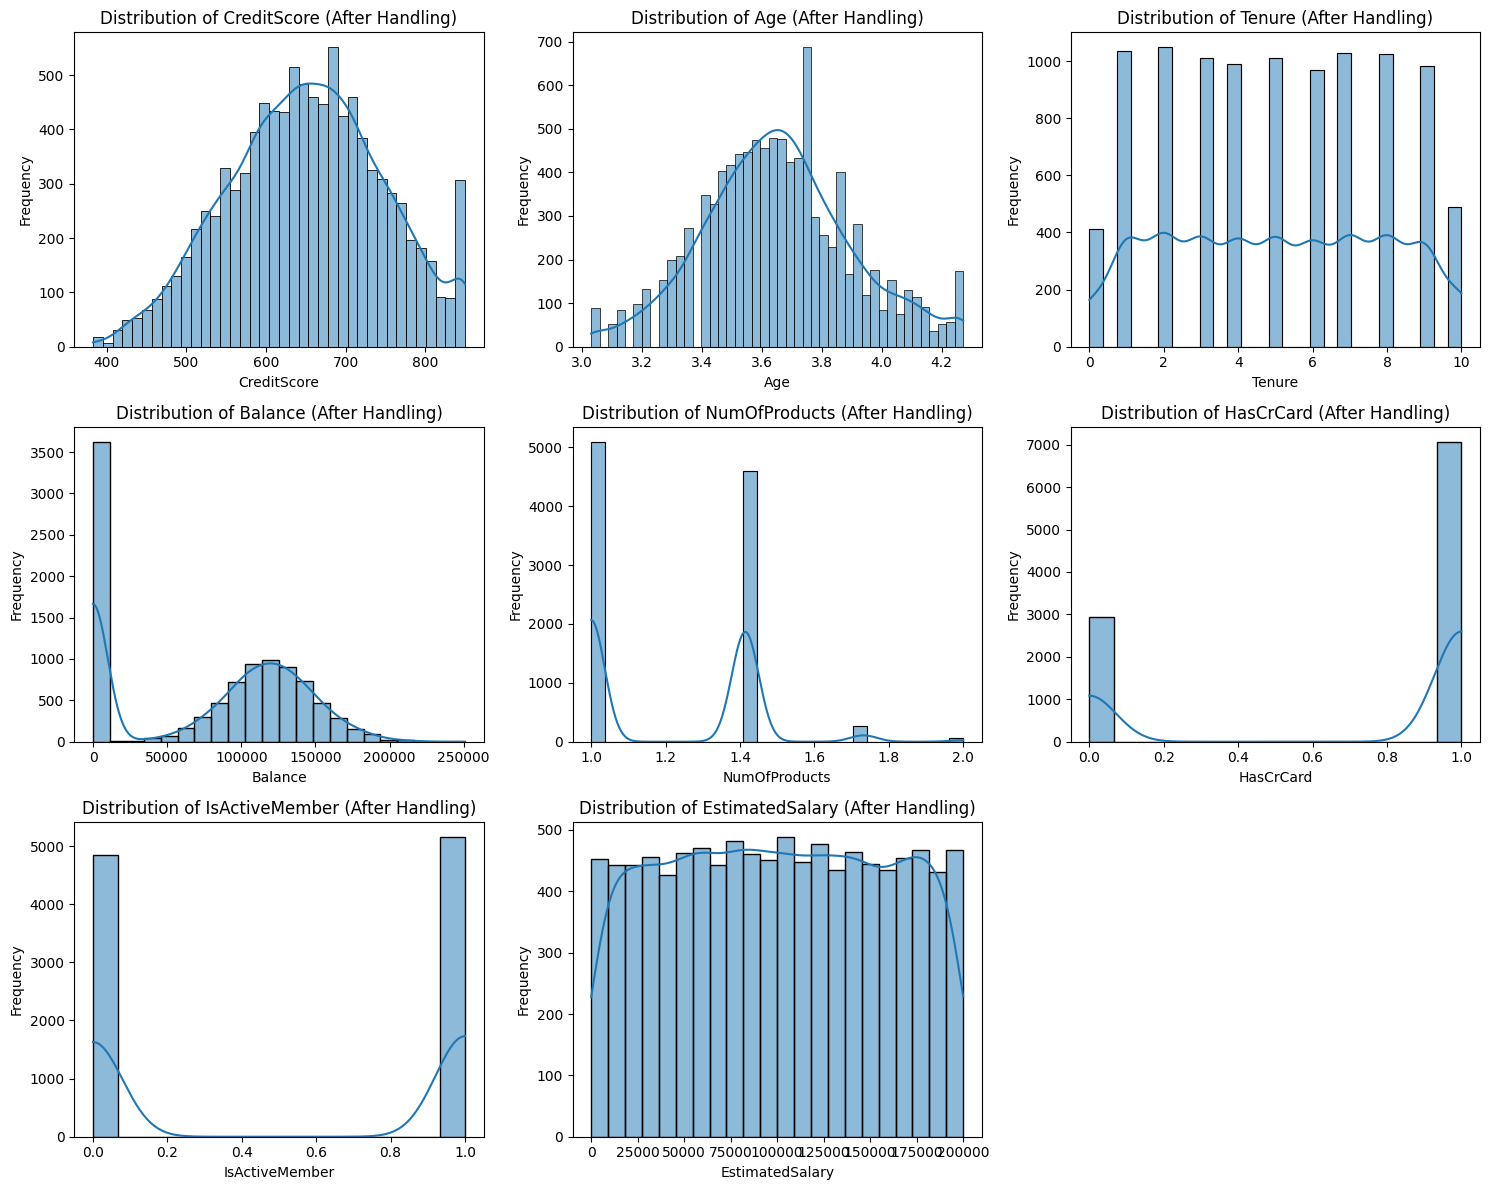


Box Plots for Numerical Features after Transformation and Outlier Handling:


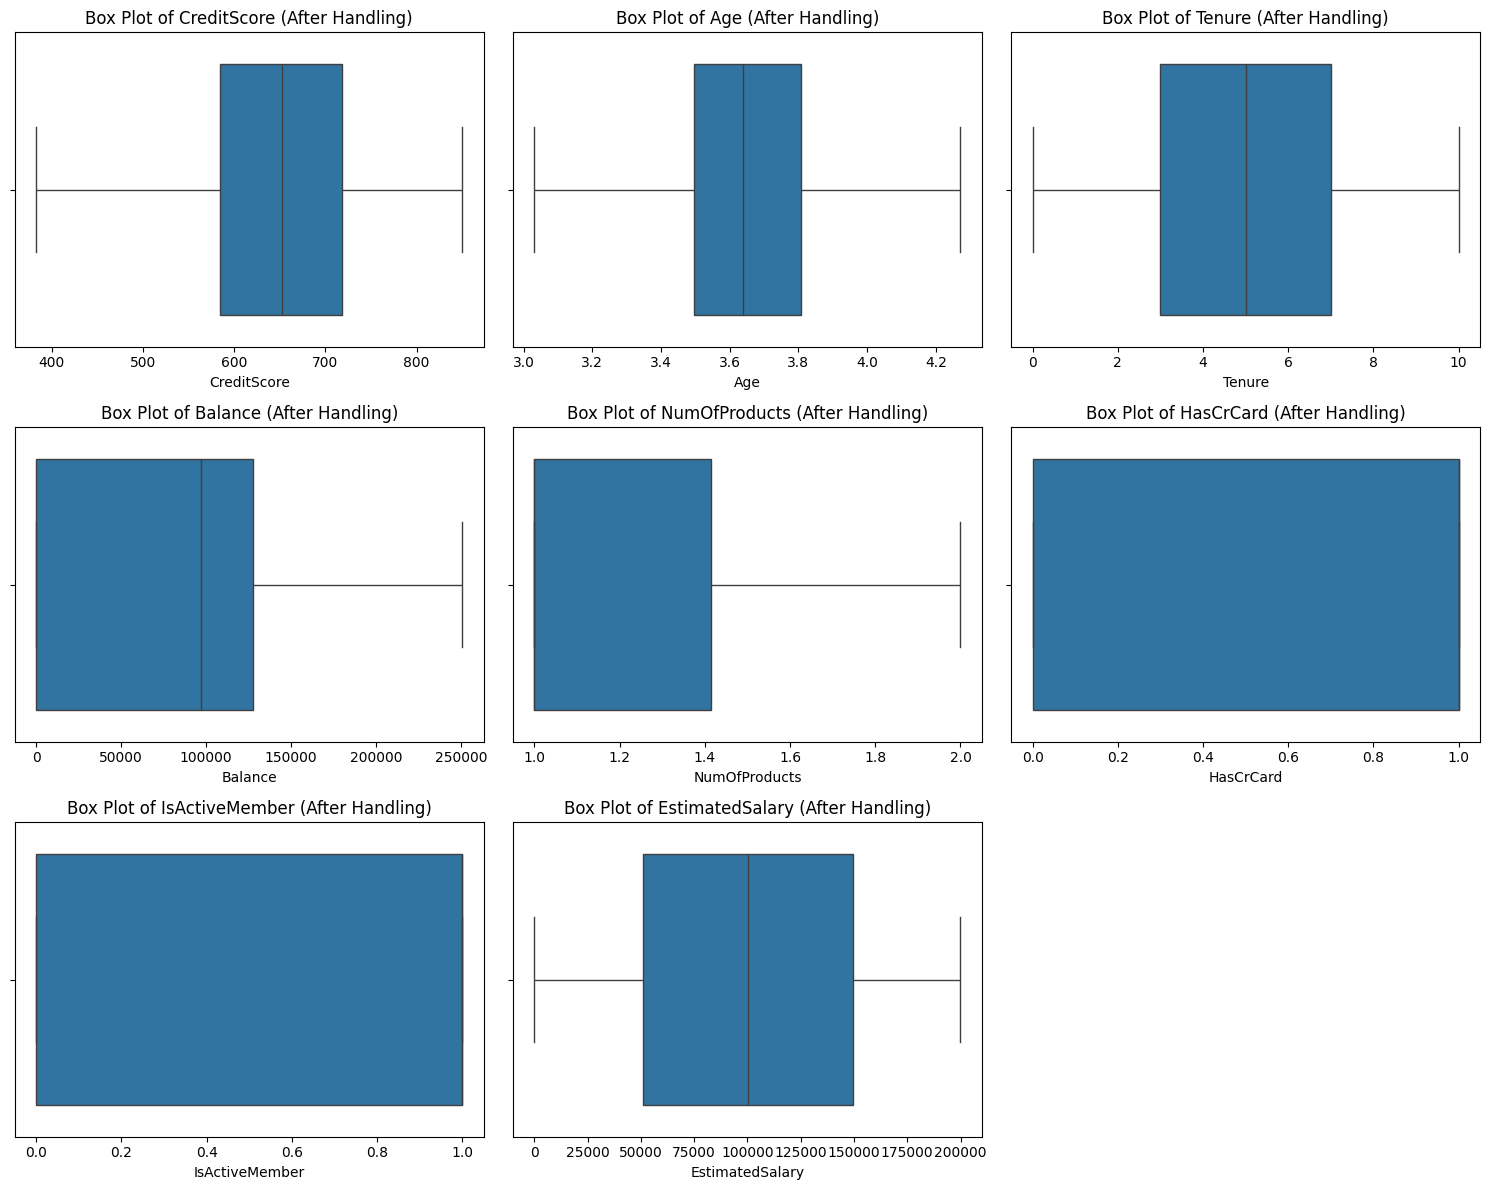

In [110]:
# Plot histograms for numerical features in the transformed data
print("Histograms for Numerical Features after Transformation and Outlier Handling:")
n_numerical_features = len(numerical_features)
n_cols = 3
n_rows = (n_numerical_features + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_transformed[col], kde=True)
    plt.title(f'Distribution of {col} (After Handling)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot box plots for numerical features in the transformed data
print("\nBox Plots for Numerical Features after Transformation and Outlier Handling:")
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df_transformed[col])
    plt.title(f'Box Plot of {col} (After Handling)')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [111]:
TARGET = 'Exited'
drop_cols = []
for c in ['CustomerId', 'RowNumber', 'Surname', 'customer_id', 'CustomerID']:
    if c in df.columns:
        drop_cols.append(c)
if drop_cols:
    df = df.drop(columns=drop_cols)


In [112]:

# Separate X,y
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set class distribution:")
print(pd.Series(y_train).value_counts())

Training set class distribution:
Exited
0    6370
1    1630
Name: count, dtype: int64


In [114]:
import pandas as pd

# Assuming y_train_smote is available from the previous SMOTE application step
print("Class count after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

print("\nProportion of classes after SMOTE:")
print(pd.Series(y_train_smote).value_counts(normalize=True))

Class count after SMOTE:
Exited
1    6370
0    6370
Name: count, dtype: int64

Proportion of classes after SMOTE:
Exited
1    0.5
0    0.5
Name: proportion, dtype: float64


Test Accuracy: 0.7935
Precision: 0.4931
Recall: 0.5283
F1-score: 0.5101
ROC-AUC: 0.6948

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1593
           1       0.49      0.53      0.51       407

    accuracy                           0.79      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.80      0.79      0.80      2000



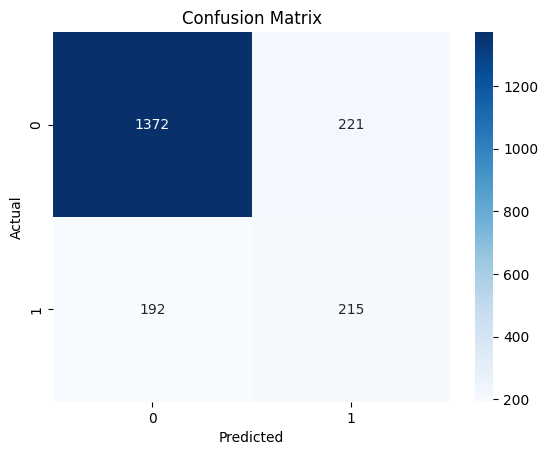

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE


# Identify categorical and numerical columns (using X from previous steps)
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=np.number).columns

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough' # Keep numerical columns
)

# Preprocess the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Apply SMOTE to the processed training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

# Train the Decision Tree model on the SMOTE-balanced training data
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Make predictions on the original test set
X_test_processed = preprocessor.transform(X_test) # Preprocess X_test
y_pred = model.predict(X_test_processed)
y_proba = model.predict_proba(X_test_processed)[:, 1]

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc = roc_auc_score(y_test, y_proba)

print("Test Accuracy: {:.4f}".format(acc))
print("Precision: {:.4f}".format(prec))
print("Recall: {:.4f}".format(rec))
print("F1-score: {:.4f}".format(f1))
print("ROC-AUC: {:.4f}".format(roc))

print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

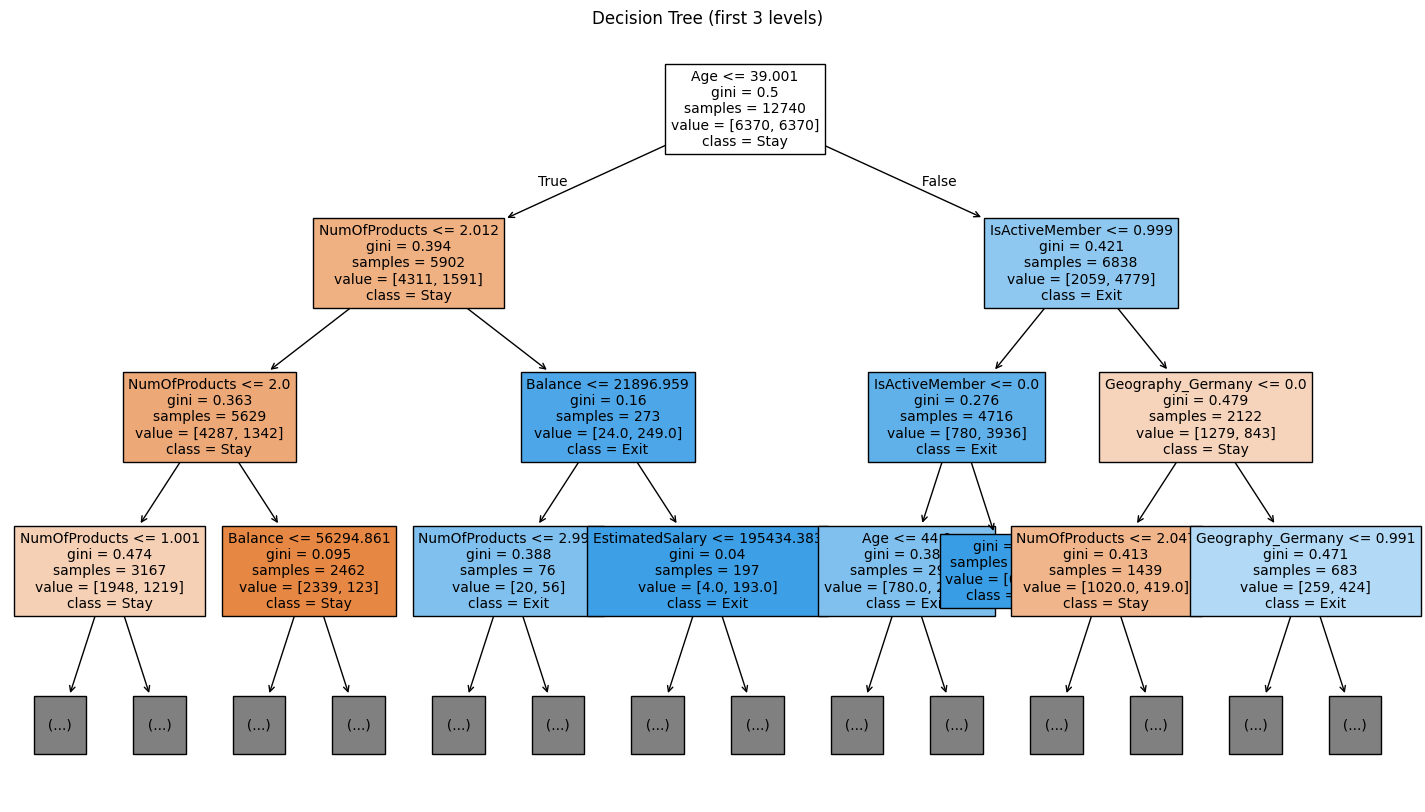

In [116]:
# -------- 8. Plot & interpret tree structure --------
# To plot a readable tree, restrict depth when plotting (e.g., max_depth=3)
plt.figure(figsize=(18,10))

# Get feature names after one-hot encoding
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=np.number).columns

# Use get_feature_names_out if available (sklearn 0.24+)
# Otherwise, manually construct feature names
try:
    ohe_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols))
except AttributeError:
    # Fallback for older sklearn versions or different scenarios
    ohe_feature_names = []
    for i, col in enumerate(cat_cols):
        # This is a simplified fallback; might need adjustment based on actual categories
        if hasattr(preprocessor.named_transformers_['cat'], 'categories_'):
             ohe_feature_names.extend([f"{col}_{cat}" for cat in preprocessor.named_transformers_['cat'].categories_[i]])
        else:
             # If categories_ is not available, just use the original column names as a placeholder
             ohe_feature_names.append(col)


feature_names = ohe_feature_names + num_cols.tolist()

plot_tree(model, # Use the trained model object
          feature_names=feature_names,
          class_names=['Stay','Exit'],
          filled=True,
          max_depth=3,
          fontsize=10)
plt.title("Decision Tree (first 3 levels)")
plt.show()

In [117]:
importances = best.named_steps['clf'].feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Top features:\n", feat_imp.head(20))

Top features:
 Age                  0.391490
NumOfProducts        0.304833
IsActiveMember       0.122115
Balance              0.106761
Geography_Germany    0.055626
EstimatedSalary      0.010274
CreditScore          0.007212
Tenure               0.000945
Gender_Female        0.000744
Gender_Male          0.000000
Geography_Spain      0.000000
Geography_France     0.000000
HasCrCard            0.000000
dtype: float64


In [118]:
import pickle


filename = 'decision_tree_model.pkl'
pickle.dump(best, open(filename, 'wb'))

